In [189]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [190]:
##help(apriori)

In [191]:
df_Retails = pd.read_excel('Online Retail.xlsx')
df_Retails.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [192]:
pd.read_excel?

In [193]:
df_Retails.shape

(541909, 8)

In [194]:
df_Retails.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [195]:
df_Retails.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [196]:
df_Retails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [197]:
df_Retails.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [198]:
df_Retails["Country"].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [199]:
df_Retails.duplicated(subset=["InvoiceNo"]).any()

np.True_

In [200]:
df_Retails.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [201]:
# df_Retails["Description"] = df_Retails["Description"].str.strip()

In [202]:
# df_Retails["Description"] = df_Retails["Description"].str?

In [203]:
# df_Retails["Description"] = df_Retails["Description"].str

In [204]:
df_Retails = (
    df_Retails
    .assign(
        Description=lambda x: (
            x["Description"]
            .str.strip()          # 去首尾空格
        )
    )
)

In [205]:
df_Retails.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [206]:
df_Retails["Description"].isna().sum()

np.int64(1455)

In [207]:
# df_Retails.dropna(axis=0
#                   , subset=["Description"]
#                   , inplace=True)

In [208]:
df_Retails.dropna(subset=["Description"])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [209]:
df_Retails.shape

(541909, 8)

In [210]:
df_Retails["Description"].isna().sum()

np.int64(1455)

In [211]:
df_Retails["InvoiceNo"] = df_Retails["InvoiceNo"].astype("str")
df_Retails = df_Retails[~df_Retails["InvoiceNo"].str.startswith('C')]

In [212]:
df_Retails = df_Retails[~df_Retails["InvoiceNo"].str.contains("C")]

In [213]:
df_Retails.shape

(532621, 8)

In [214]:
# df_ShoppingCarts = (df_Retails[df_Retails["Country"] == "Germany"]
#                     .groupby(["InvoiceNo","Description"])["Quantity"]
#                     .sum()
#                     .unstack()
#                     .reset_index()
#                     .fillna(0)
#                     .set_index("InvoiceNo"))
# df_ShoppingCarts.shape

In [226]:
# 预处理：清理商品名称并过滤空值
df_Retails_clean = (
    df_Retails
    .loc[df_Retails["Country"].eq("Germany")]
    .dropna(subset=["Description"])  # 提前删除空商品
    .assign(Description=lambda x: x["Description"].str.strip())  # 清理空格
)

df_ShoppingCarts = (
    df_Retails_clean
    .groupby(["InvoiceNo", "Description"], observed=True)["Quantity"]  # 避免隐式分类转换
    .sum()
    .unstack(fill_value=0)  
    .rename_axis(columns=None) 
)
df_ShoppingCarts.shape

(457, 1695)

In [216]:
df_ShoppingCarts.head()

,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [217]:
df_ShoppingCarts.reset_index().duplicated(subset=["InvoiceNo"]).any()

np.False_

In [218]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
df_ShoppingCarts_sets = df_ShoppingCarts.map(encode_units)
df_ShoppingCarts_sets

,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
df_Frequent_Itemsets = apriori(df_ShoppingCarts_sets
                             , min_support=0.07
                             , use_colnames=True)
df_Frequent_Itemsets

E:\Software\anaconda3\envs\python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.102845,(6 RIBBONS RUSTIC CHARM)
1,0.070022,(ALARM CLOCK BAKELIKE PINK)
2,0.072210,(GUMBALL COAT RACK)
3,0.091904,(JAM MAKING SET PRINTED)
4,0.078775,(JUMBO BAG RED RETROSPOT)
5,0.100656,(JUMBO BAG WOODLAND ANIMALS)
6,0.078775,(LUNCH BAG WOODLAND)
7,0.085339,(PACK OF 72 RETROSPOT CAKE CASES)
8,0.115974,(PLASTERS IN TIN CIRCUS PARADE)
9,0.107221,(PLASTERS IN TIN SPACEBOY)


In [220]:
df_Frequent_Itemsets.shape

(39, 2)

In [221]:
df_AssociationRules = association_rules(df_Frequent_Itemsets
                                        , metric="lift"
                                        , min_threshold=1)
df_AssociationRules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(POSTAGE),(6 RIBBONS RUSTIC CHARM),0.818381,0.102845,0.091904,0.112299,1.091933,1.0,0.007738,1.010651,0.463569,0.110818,0.010539,0.502958
1,(6 RIBBONS RUSTIC CHARM),(POSTAGE),0.102845,0.818381,0.091904,0.893617,1.091933,1.0,0.007738,1.707221,0.093844,0.110818,0.414253,0.502958
2,(POSTAGE),(JUMBO BAG WOODLAND ANIMALS),0.818381,0.100656,0.087527,0.106952,1.062544,1.0,0.005152,1.007049,0.324096,0.105263,0.007000,0.488259
3,(JUMBO BAG WOODLAND ANIMALS),(POSTAGE),0.100656,0.818381,0.087527,0.869565,1.062544,1.0,0.005152,1.392414,0.065450,0.105263,0.281823,0.488259
4,(POSTAGE),(PLASTERS IN TIN CIRCUS PARADE),0.818381,0.115974,0.100656,0.122995,1.060539,1.0,0.005746,1.008006,0.314301,0.120735,0.007942,0.495460


In [222]:
df_AssociationRules.shape

(34, 14)

In [223]:
df_A = df_AssociationRules[(
    df_AssociationRules['lift'] >= 2
) & (
    df_AssociationRules['confidence'] >= 0.8
)]
df_A

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
24,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,1.0,0.092679,4.52954,0.837922,0.483871,0.779227,0.684524
28,"(POSTAGE, ROUND SNACK BOXES SET OF 4 FRUITS)",(ROUND SNACK BOXES SET OF4 WOODLAND),0.150985,0.245077,0.124726,0.826087,3.370730,1.0,0.087724,4.34081,0.828405,0.459677,0.769628,0.667508


In [224]:
df_A.shape

(2, 14)

<Axes: xlabel='support', ylabel='confidence'>

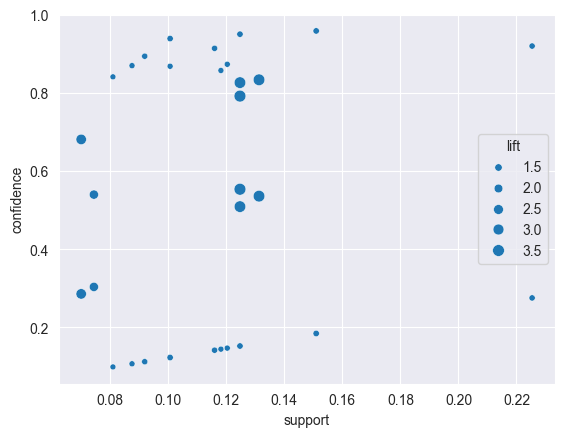

In [225]:
import seaborn as sns
sns.scatterplot(
    x="support",
    y="confidence",
    size="lift",
    data=df_AssociationRules
)
